<h1 style="color:#2bf0b5;"> <b>Neuroscience</b> HW4-1 - Lachin Naghashyar</h1>

---

<h2 style="color:#f06ff2;"> <b> Implementation of Hopfield Network</b></h2>

1. load the images in data folder:

In [9]:
import cv2 as cv2
import os

import matplotlib.pyplot as plt
import numpy as np

In [11]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

In [12]:
def show_images(images):
    for image in images:
        plt.imshow(image)
        plt.show()

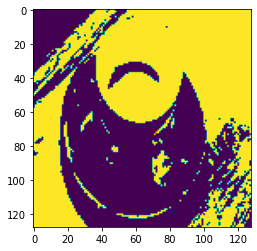

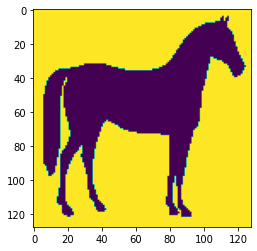

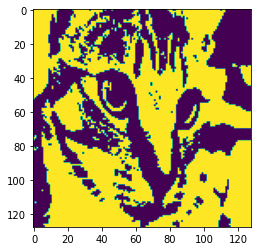

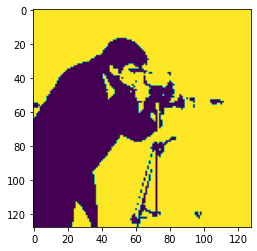

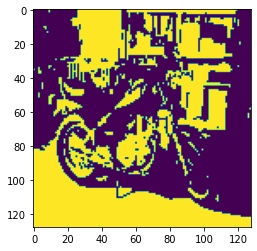

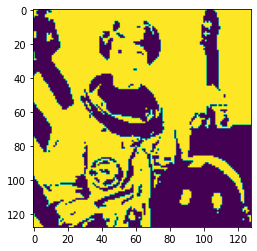

In [13]:
initial_images = load_images_from_folder("train")
show_images(initial_images)

2. Train the hopfield network and obtain the weights

In [14]:
M = len(initial_images)
N = initial_images[0].shape[0] * initial_images[0].shape[1]
image_shape = initial_images[0].shape

In [15]:
def pre_process_images(images): # to reshape them in to a vector containing -1 and 1s (1 for the black pixels and -1 for the white ones)
    processed = []
    for image in images:
        t = np.where(image < np.mean(image), -1, 1)
        t = t.flatten()
        processed.append(t)
    return processed

In [16]:
def train(N, images): # using the formula in slides for W:
    W = np.zeros((N, N), dtype=np.int8)
    for i in images:
        W += np.outer(i, i)
    return W / N

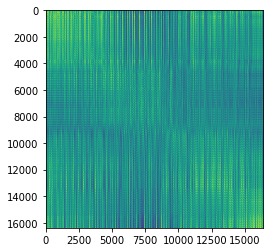

In [17]:
processed_images = pre_process_images(initial_images)
W = train(N, processed_images)
plt.imshow(W)
plt.show()

use the train set as the inputs of the network:

In [18]:
def predict(images):
    for image in images:
        error = None
        S = image
        while error is None or error > 100:
            Si = np.where(S < np.mean(S), -1, 1)
            Si = Si.flatten()
            S = np.matmul(W, Si)
            S = np.where(S < 0, -1, 1)
            error = np.sum(np.abs(S - Si))
            print(error)
        print("error: " + str(error))
        np.where(S == 1, 255, 0)
        result_image = np.reshape(S, image.shape)
        plt.title("matched prototype")
        plt.imshow(result_image)
        plt.show()
        plt.title("inital image")
        plt.imshow(image)
        plt.show()

0
error: 0


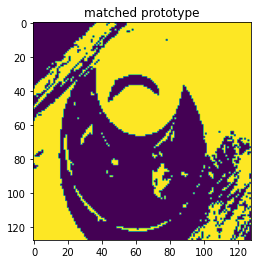

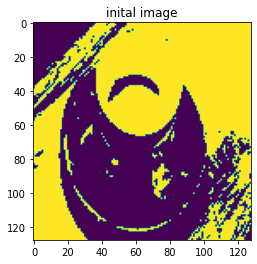

0
error: 0


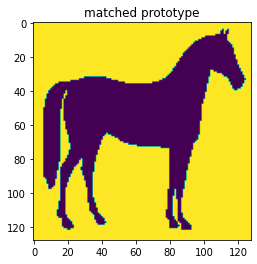

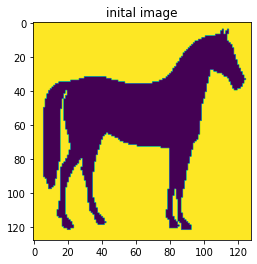

0
error: 0


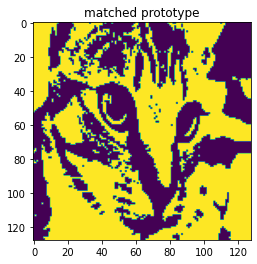

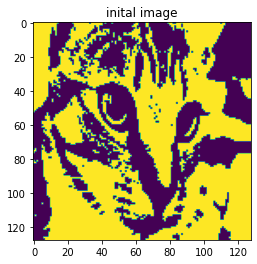

0
error: 0


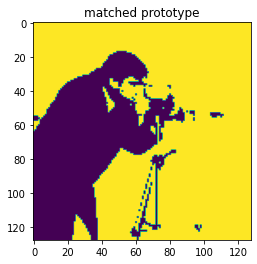

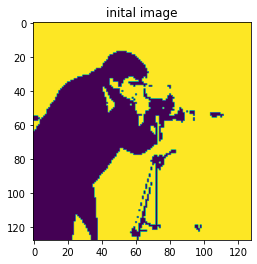

0
error: 0


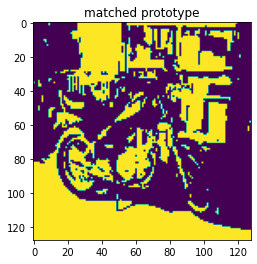

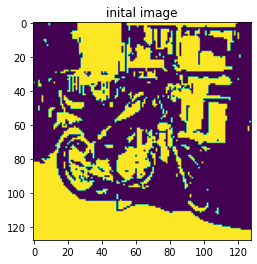

0
error: 0


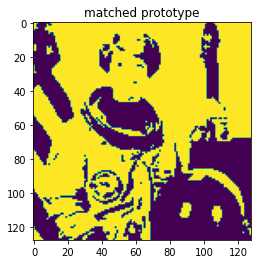

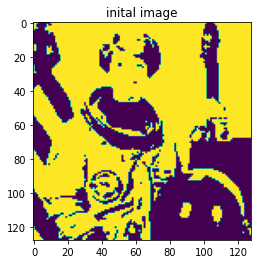

In [19]:
predict(initial_images)

As you can see, we get exact pattern as the output

4. add some noise to the images by randomly altering 3000 pixels in each image

In [20]:
def replaceRandom(image, size):
    temp = np.asarray(image)
    shape = temp.shape
    temp = temp.flatten()
    random_indices = np.random.choice(temp.size, size=size)
    temp[random_indices] = np.random.randint(0, 255, size)
    return temp.reshape(shape)


def apply_noise(images, size):
    noisy_images = []
    for image in images:
        result_image = replaceRandom(image, size)
        noisy_images.append(result_image)
        plt.imshow(result_image)
        plt.show()
    return noisy_images

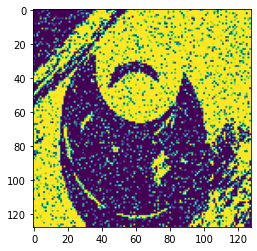

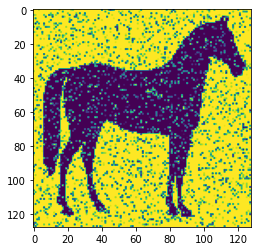

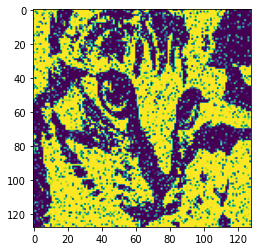

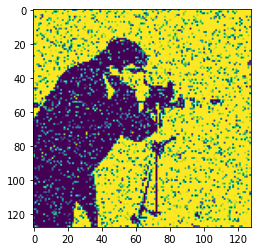

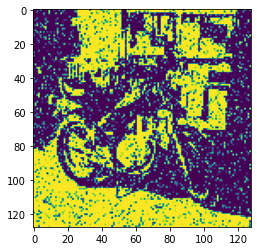

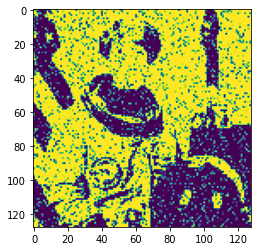

In [21]:
noisy_images_3000 = apply_noise(initial_images, 3000)

5. calculate the correlation between each noisy image and the prototypes:

In [22]:
def compute_correlation():
    for i in range(M):
        for j in range(M):
            noisy = np.where(noisy_images_3000[i] < np.mean(noisy_images_3000[i]), -1, 1)
            initial = np.where(initial_images[j] < np.mean(initial_images[j]), -1, 1)
            correlation = (1/N) * np.dot(noisy.flatten(), initial.flatten())
            print("the correlation between the " + str(i) + "th (noisy) and " + str(j) + "th (initial) images is: " + str(correlation))


In [23]:
compute_correlation()

the correlation between the 0th (noisy) and 0th (initial) images is: 0.8319091796875
the correlation between the 0th (noisy) and 1th (initial) images is: -0.01806640625
the correlation between the 0th (noisy) and 2th (initial) images is: -0.0482177734375
the correlation between the 0th (noisy) and 3th (initial) images is: 0.0113525390625
the correlation between the 0th (noisy) and 4th (initial) images is: 0.0352783203125
the correlation between the 0th (noisy) and 5th (initial) images is: 0.0902099609375
the correlation between the 1th (noisy) and 0th (initial) images is: -0.018310546875
the correlation between the 1th (noisy) and 1th (initial) images is: 0.8172607421875
the correlation between the 1th (noisy) and 2th (initial) images is: 0.061767578125
the correlation between the 1th (noisy) and 3th (initial) images is: 0.31103515625
the correlation between the 1th (noisy) and 4th (initial) images is: 0.013671875
the correlation between the 1th (noisy) and 5th (initial) images is: -0.

6. predict the output on noisy image set

2754
0
error: 0


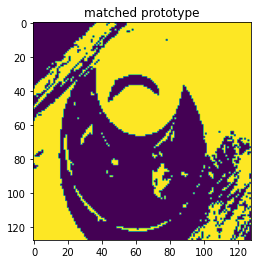

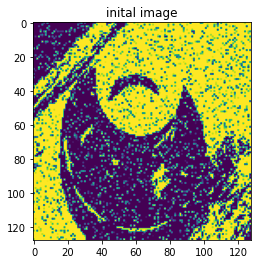

2994
0
error: 0


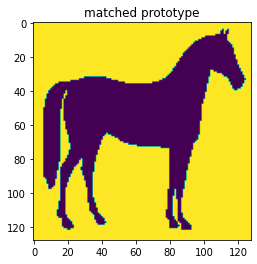

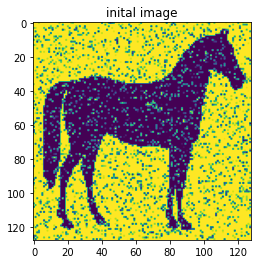

2770
0
error: 0


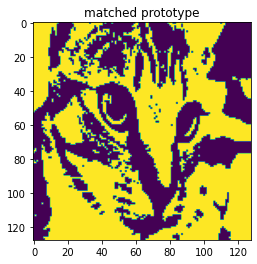

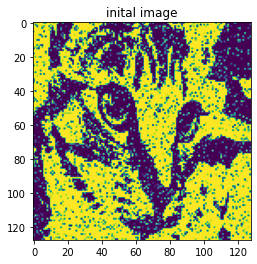

3036
0
error: 0


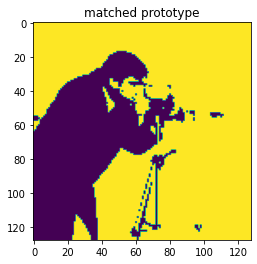

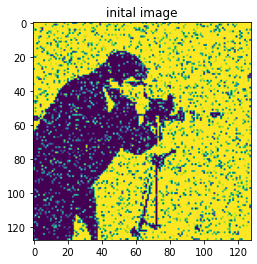

2610
0
error: 0


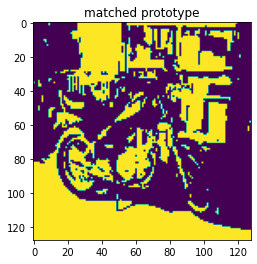

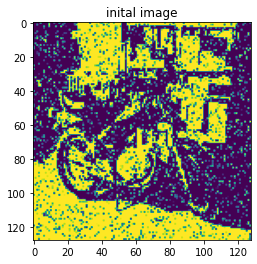

2774
0
error: 0


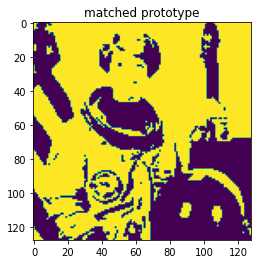

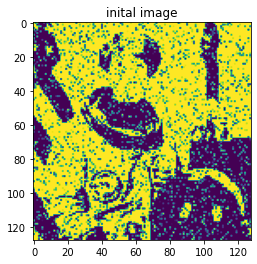

In [24]:
predict(noisy_images_3000)

Naturally, since the input images are noisy we are going to have some recognition error in the output result. (because it is not the exact same image and has a bit of noise in it). But since the amount of noise is not too much, we are expecting to get the correct patten as the output result.

7. apply noise on 8000 pixels:

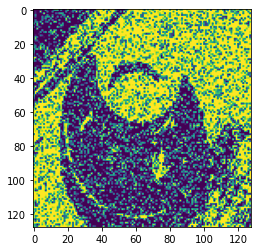

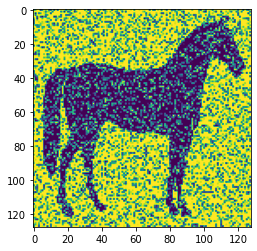

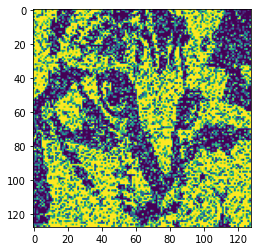

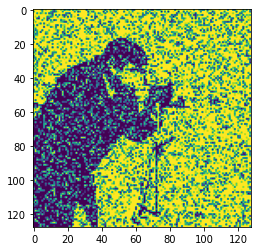

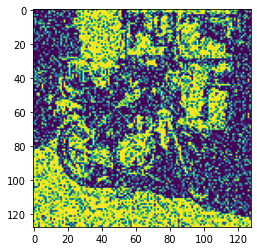

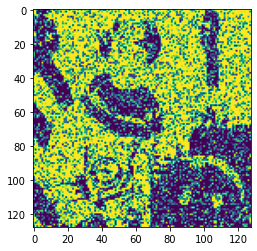

6392
0
error: 0


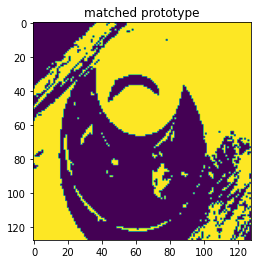

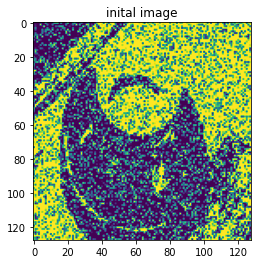

6804
0
error: 0


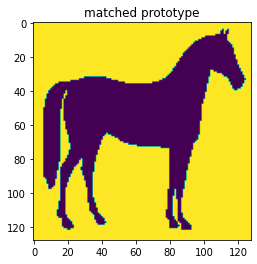

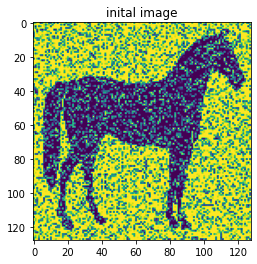

6382
0
error: 0


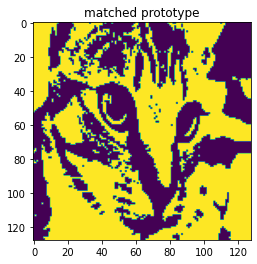

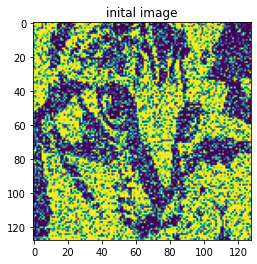

6782
0
error: 0


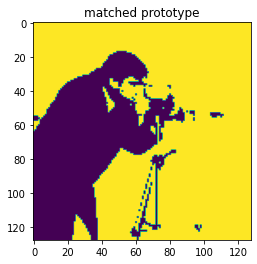

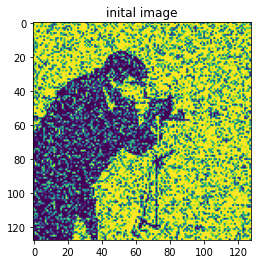

6316
0
error: 0


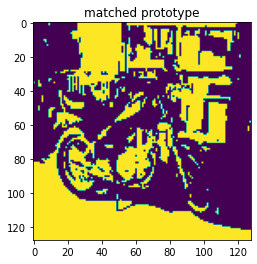

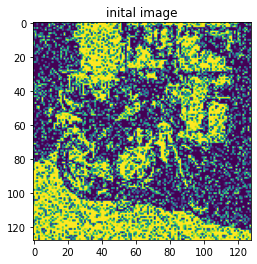

6466
0
error: 0


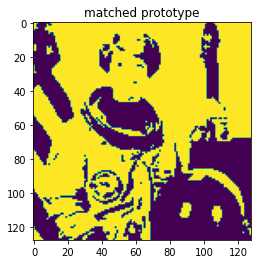

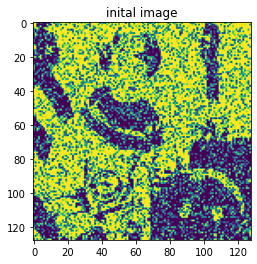

In [25]:
noisy_images_8000 = apply_noise(initial_images, 8000)
predict(noisy_images_8000)

recognition error is higher compared to the previous part, but network is still able to recognize the pattern correctly. We know that by having a small number of patterns (prototypes) and small amount of noise, we can reduce the recognition error. When having noise can not obtain a result with zero error.